# Introduction

Sentiment analysis is a valuable tool for understanding public opinion on various topics. It can be used in business to improve products and customer satisfaction, in politics to gauge public opinion on candidates and policies, in finance to analyze market sentiment, and in social media to understand trends. Overall, sentiment analysis provides valuable insights that can inform decision-making in many fields.

In this project, the aim is to design and implement supervised machine learning models to help Sentiment Analysis with Tweets (is it positive or negative?)

# Import and read the dataset

* Import Necessary library’s and Modules

In [1]:
# utilities
import re  
import pickle 
import numpy as np  
import pandas as pd 

# plotting
import seaborn as sns   
from wordcloud import WordCloud  
import matplotlib.pyplot as plt  

# nltk
import nltk
nltk.download('wordnet', quiet=True)
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords  


# sklearn   
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier


from sklearn.model_selection import train_test_split 
from sklearn.feature_extraction.text import TfidfVectorizer  
from sklearn.metrics import confusion_matrix, classification_report  

* Read the dataset

In [2]:
DATASET_COLUMNS  = ["target", "ids", "date", "flag", "user", "text"]
DATASET_ENCODING = "ISO-8859-1"
dataset = pd.read_csv('dataset2000tweets.csv' , encoding=DATASET_ENCODING , names=DATASET_COLUMNS)

# Explore the data

In [3]:
dataset.head()

,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fireÊ
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [4]:
print('number of columns in the data is:  ', len(dataset.columns))
print('number of rows in the data is:  ', len(dataset))

number of columns in the data is:   6
number of rows in the data is:   2001


# Plotting the distribution for dataset.

* Plotting the distribution for dataset based on target.

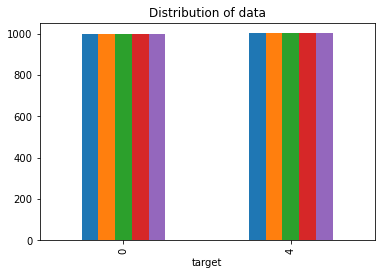

In [5]:
ax = dataset.groupby('target').count().plot(kind='bar', title='Distribution of data',legend=False) 

text, sentiment = list(dataset['text']), list(dataset['target'])

<AxesSubplot:xlabel='target', ylabel='count'>

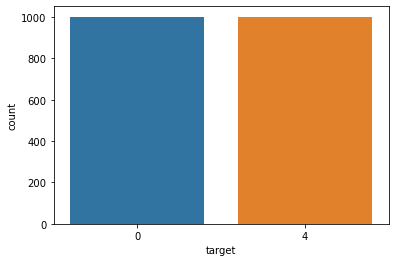

In [6]:
sns.countplot(x='target', data=dataset)

# Data Preprocessing

Before training the model, there are numerous pre-processing procedures on the dataset, mostly eliminating stopwords and emojis. For greater generality, the written material is subsequently transformed to lowercase.
Following that, the punctuations were cleaned and eliminated, removing superfluous noise from the dataset. Following that, deleteing the repetitive letters from the words, as well as the URLs, as they are of little significance.

* Selecting the text and Target column for our further analysis and replacing the values for better understanding. (Assigning 1 to Positive sentiment 4)

In [7]:
data=dataset[['text','target']]
data.loc[data['target'] == 4, 'target'] = 1

* Print unique values of target variables
0:negative 
1:positive 

In [8]:
data['target'].unique()

array([0, 1])

* Separating positive and negative tweets ,making the data easier to manage and combining them

In [9]:
data_positive = data[data['target'] == 1]
data_negative = data[data['target'] == 0]

data_positive = data_positive.iloc[:int(1000)]
data_negative = data_negative.iloc[:int(1000)]

dataset = pd.concat([data_positive, data_negative])

* making the tweets more generalised and more effective to be classified  

In [10]:
dataset['text']=dataset['text'].str.lower()
dataset['text'].tail() 

995    @dkoenigs thanks man.ê i'm so very grateful.ê ...
996    @t_wolfeê i miss u too. i'm totally comin back...
997    @sniffinglue ohhh. i love it. ps i'm sad we di...
998            and somehow i still end up in this placeê
999           @kisluvkis oh that is very sad, poor boy.ê
Name: text, dtype: object

* Defining set containing all stopwords in English to remove it from tweets text to make it clean

In [11]:
stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from',
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 
             're','s', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves']

STOPWORDS = set(stopwordlist)
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])
dataset['text'] = dataset['text'].apply(lambda text: cleaning_stopwords(text)) 
dataset['text'].head() 

1000    @msteagan ...and way: rewatched sun goddess la...
1001    @dr3ezii you'll prolly wake 2 tweet..hope ur d...
1002    planned young adult retreat valerie...and fina...
1003    @aubreyoday aubrey u gotta follow meê r u stil...
1004                                @ammirelleê love youê
Name: text, dtype: object

* Cleaning and removing punctuations, repeating characters, URL’s and numbers

In [12]:
import string
english_punctuations = string.punctuation 
punctuations_list = english_punctuations 

def cleaning_punctuations(text):  
    translator = str.maketrans('', '', punctuations_list)   
    return text.translate(translator) 
dataset['text']= dataset['text'].apply(lambda x: cleaning_punctuations(x))

dataset['text'].tail() 

def cleaning_repeating_char(text): 
    return re.sub(r'(.)1+', r'1', text)
dataset['text'] = dataset['text'].apply(lambda x: cleaning_repeating_char(x))
dataset['text'].tail()

def cleaning_URLs(data):
    return re.sub('((www.[^s]+)|(https?://[^s]+))',' ',data)
dataset['text'] = dataset['text'].apply(lambda x: cleaning_URLs(x))
dataset['text'].tail()


def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data) 
dataset['text'] = dataset['text'].apply(lambda x: cleaning_numbers(x))
dataset['text'].tail()

995    dkoenigs thanks manê im gratefulê feel unworth...
996    twolfeê miss u too im totally comin back tho l...
997    sniffinglue ohhh love it ps im sad didnt get h...
998                             somehow still end placeê
999                           kisluvkis oh sad poor boyê
Name: text, dtype: object

In [13]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'w+')
dataset['text'] = dataset['text'].apply(tokenizer.tokenize)
dataset['text'].head()

1000    [w, w, w]
1001       [w, w]
1002          [w]
1003       [w, w]
1004           []
Name: text, dtype: object

In [14]:
import nltk
st = nltk.PorterStemmer()
def stemming_on_text(data):
    text = [st.stem(word) for word in data]
    return data
dataset['text']= dataset['text'].apply(lambda x: stemming_on_text(x))
dataset['text'].head()

1000    [w, w, w]
1001       [w, w]
1002          [w]
1003       [w, w]
1004           []
Name: text, dtype: object

* Separating input features ("target", "ids", "date", "flag", "user", "text") from label ("positive","negative")

In [15]:
X=data.text
y=data.target

# Plot a cloud of words for negative and positive tweets

* generates a word cloud from the negative texts


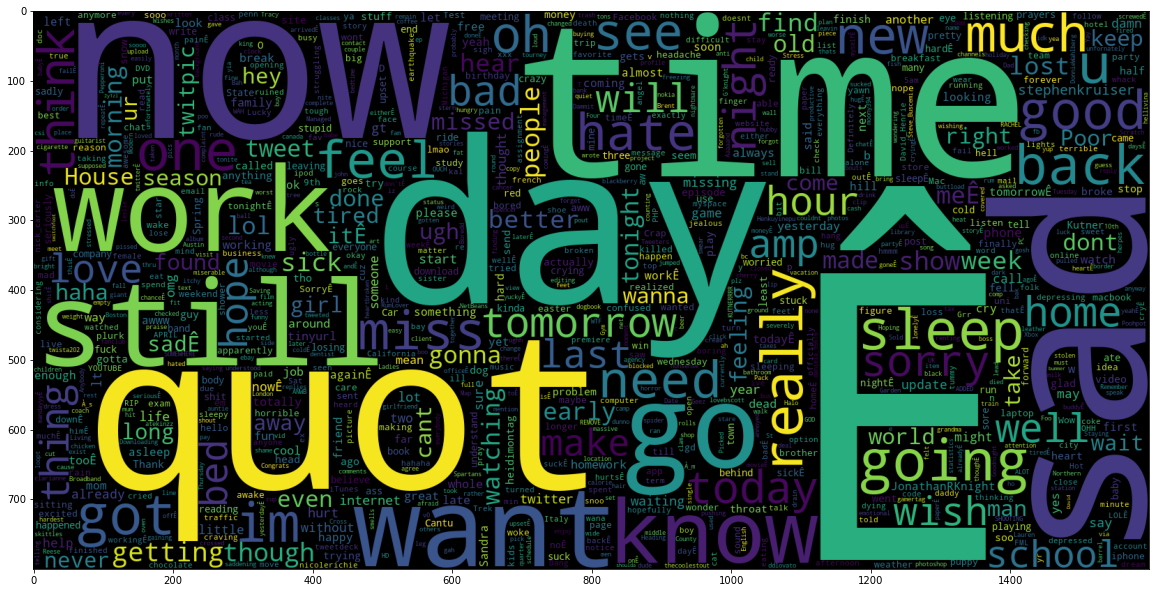

In [16]:
data_negative = data['text'][:1000] 
plt.figure(figsize = (20,20))

wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,collocations=False).generate(" ".join(data_negative))

plt.imshow(wc)  

* generates a word cloud from the positive texts



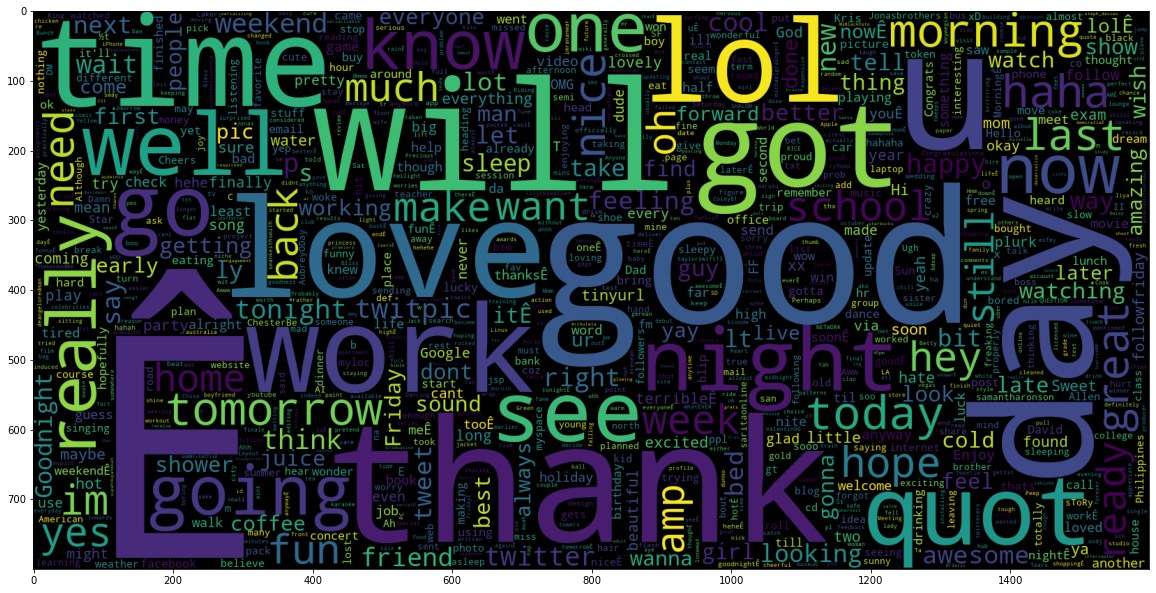

In [17]:
data_positive = data['text'][1000:]
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800, collocations=False).generate(" ".join(data_positive))

plt.imshow(wc)

# Building and preparing the training model 

Separating the 90% data for training data and 10% for testing data


*   x_train: It is used to represent features for the training data

*   x_test: It is used to represent features for testing data
* y_train: It is used to represent dependent variables for training data
* y_test: It is used to represent independent variable for testing data



In [18]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.10, random_state =900)

* Transforming Dataset using TF-IDF Vectorizer


In [19]:
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=500000)
vectoriser.fit(X_train)
print('No. of feature_words: ', len(vectoriser.get_feature_names()))  

No. of feature_words:  21895


/Users/reem/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [20]:
X_train = vectoriser.transform(X_train)
X_test  = vectoriser.transform(X_test)

In [21]:
def model_Evaluate(model):
  y_pred = model.predict(X_test)
  print(classification_report(y_test, y_pred))

  cf_matrix = confusion_matrix(y_test, y_pred)
  categories = ['Negative','Positive']
  group_names = ['True Neg','False Pos', 'False Neg','True Pos']

  group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
  labels = [f'{v1}n{v2}' for v1, v2 in zip(group_names,group_percentages)]
  labels = np.asarray(labels).reshape(2,2)
  
  sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
  xticklabels = categories, yticklabels = categories)
  plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
  plt.ylabel("Actual values" , fontdict = {'size':14}, labelpad = 10)
  plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

  #plots the confusion matrix using the confusion_matrix and sns.heatmap functions

# fits Bernoulli Naive Bayes (BNB) model

              precision    recall  f1-score   support

           0       0.78      0.57      0.66       106
           1       0.63      0.82      0.71        95

    accuracy                           0.69       201
   macro avg       0.70      0.69      0.68       201
weighted avg       0.71      0.69      0.68       201



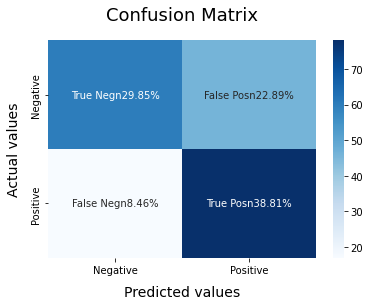

In [22]:
BNBmodel = BernoulliNB()
BNBmodel.fit(X_train, y_train)

model_Evaluate(BNBmodel)
y_pred1 = BNBmodel.predict(X_test)

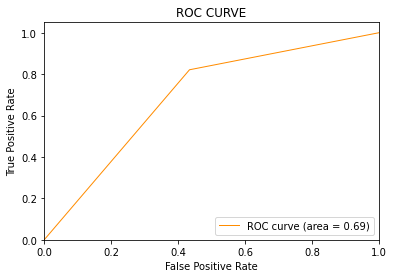

In [23]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_pred1)

roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

#  Fits Support Vector Machine (SVM) model

              precision    recall  f1-score   support

           0       0.75      0.77      0.76       106
           1       0.74      0.71      0.72        95

    accuracy                           0.74       201
   macro avg       0.74      0.74      0.74       201
weighted avg       0.74      0.74      0.74       201



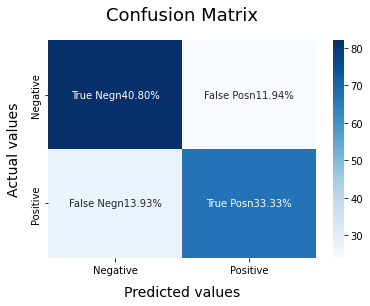

In [24]:
SVCmodel = LinearSVC()
SVCmodel.fit(X_train, y_train)
model_Evaluate(SVCmodel)
y_pred2 = SVCmodel.predict(X_test)

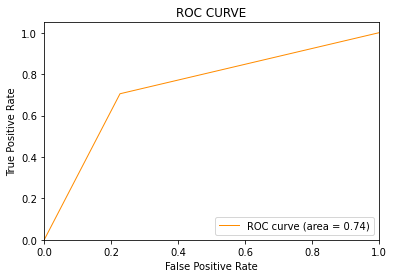

In [25]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred2)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()


# Conclusion

In conclusion, the machine learning model built by support vector machine (SVM) and Naive Bayes to classify the sentiment of tweets. The dataset used in this model contained 2000 processed tweets with their corresponding sentiments. The data was pre-processed to clean and remove stopwords, lowercase the text, and to balance the positive and negative sentiments. The data was then split into training and testing sets. The TfidfVectorizer was used to convert the text into numerical features, which were then fed into the models. The performance of the models was evaluated using confusion matrix and classification report. The results showed that the Support Vector Machine (SVM) model was the most accurate among the two models with an accuracy of about 74%.